In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
import scipy.cluster.hierarchy as shc
from sklearn.metrics import davies_bouldin_score, silhouette_score
from scipy.stats import mode

from matplotlib import pyplot
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import dask.dataframe as dd
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_excel('WeatherPredictionAdjusted.xlsx')

In [3]:
df.head()

,cloud_cover,humidity,pressure,global_radiation,precipitation,temp_mean,temp_min,temp_max,sunshine,wind_gust,wind_speed
0,6.538462,0.891250,1.024547,0.315000,0.211176,1.694444,-0.252941,4.011111,1.264286,7.257143,2.500000
1,6.461538,0.873750,1.026200,0.376875,0.045294,3.022222,0.876471,5.250000,1.935714,8.242857,3.025000
2,5.923077,0.840000,1.023947,0.365000,0.088235,3.488889,2.011765,6.444444,1.021429,11.557143,3.658333
3,4.846154,0.820625,1.018627,0.394375,0.340000,4.205556,1.935294,6.755556,3.214286,13.914286,3.783333
4,4.307692,0.853750,1.019800,0.488750,0.027647,3.283333,0.211765,6.822222,3.950000,10.957143,3.208333


In [4]:
df.columns

Index(['cloud_cover', 'humidity', 'pressure', 'global_radiation',
       'precipitation', 'temp_mean', 'temp_min', 'temp_max', 'sunshine',
       'wind_gust', 'wind_speed'],
      dtype='object')

In [5]:
df = df.dropna()

In [6]:
import numpy as np

def scale_to_range(data, min_val, max_val):
    min_data = np.min(data, axis=0)
    max_data = np.max(data, axis=0)
    scaled_data = min_val + ((data - min_data) / (max_data - min_data)) * (max_val - min_val)
    return scaled_data
scaled_dataset = scale_to_range(df, 0, 10)

print("Original Dataset:")
print(df)
print("\nScaled Dataset (0-10):")
print(scaled_dataset)


Original Dataset:
      cloud_cover  humidity  pressure  global_radiation  precipitation  \
0        6.538462  0.891250  1.024547          0.315000       0.211176   
1        6.461538  0.873750  1.026200          0.376875       0.045294   
2        5.923077  0.840000  1.023947          0.365000       0.088235   
3        4.846154  0.820625  1.018627          0.394375       0.340000   
4        4.307692  0.853750  1.019800          0.488750       0.027647   
...           ...       ...       ...               ...            ...   
3649     5.153846  0.845000  1.004827          0.322500       0.144118   
3650     5.846154  0.870625  1.003400          0.295000       0.539412   
3651     7.076923  0.916250  0.998780          0.215625       0.505294   
3652     6.923077  0.904375  0.997367          0.253750       0.317059   
3653     6.076923  0.833125  1.002833          0.320625       0.181765   

      temp_mean  temp_min  temp_max  sunshine  wind_gust  wind_speed  
0      1.694444 -0.252

In [7]:
scaled_dataset.describe()

,cloud_cover,humidity,pressure,global_radiation,precipitation,temp_mean,temp_min,temp_max,sunshine,wind_gust,wind_speed
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,7.829136,5.965179,7.524311,3.855004,1.538871,5.448975,5.839851,5.197239,3.448380,2.660097,3.446232
std,1.022468,1.697177,0.807906,2.531215,1.356576,2.070938,2.039956,2.085439,2.023564,1.162060,1.472497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.185629,4.824191,7.084641,1.387572,0.439733,3.760557,4.225366,3.445845,1.813119,1.810842,2.362869
50%,7.964072,6.019691,7.534584,3.575380,1.189635,5.472128,5.844873,5.255026,3.131188,2.474048,3.213783
75%,8.622754,7.229255,8.012514,5.981031,2.316451,7.198480,7.609874,6.964446,4.810644,3.292964,4.303797
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
df = scaled_dataset

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

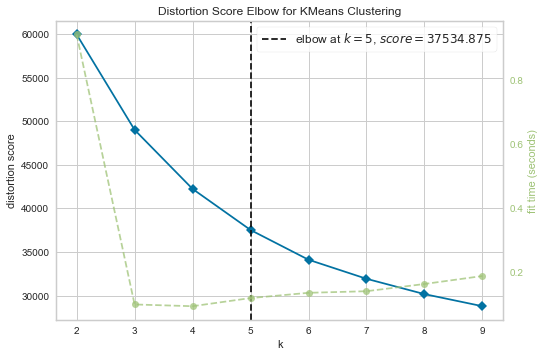

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
#Elbow Curve
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(df)
visualizer.show()  

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

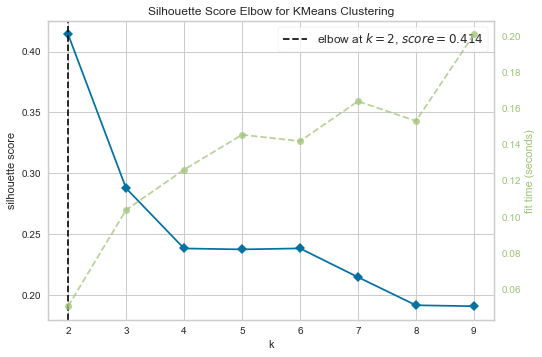

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [10]:
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(df)
visualizer.show()  

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

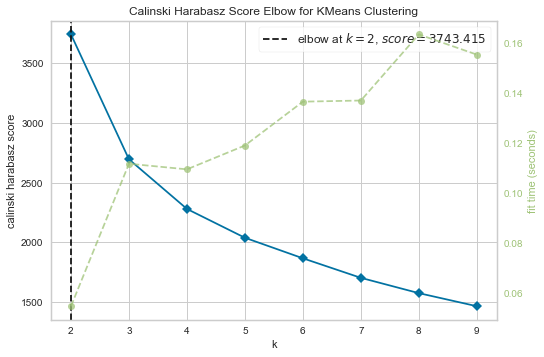

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10
                                       ),metric='calinski_harabasz', timings= True)
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

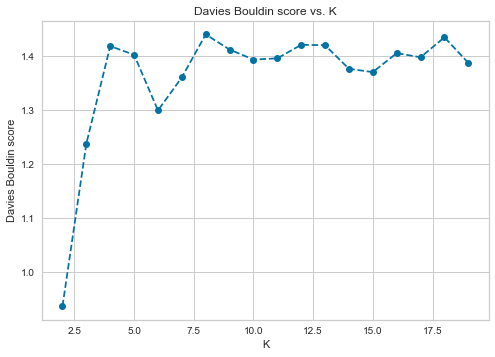

In [12]:
def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center)
    model = kmeans.fit_predict(df)
    score = davies_bouldin_score(df, model)
    
    return score
scores = []
centers = list(range(2,20))
for center in centers:
    scores.append(get_kmeans_score(df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

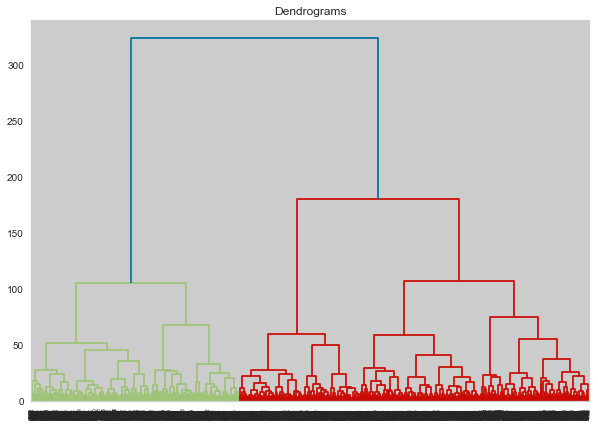

In [13]:
# Dendogram for Heirarchical Clustering

pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [30]:
X=df
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit_predict(X)
kmeans_labels = kmeans.predict(X)
print("Davies-Bouldin Index:", davies_bouldin_score(X, kmeans_labels))
print("Silhouette Score:", silhouette_score(X, kmeans_labels))

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index: 0.9370097793598018
Silhouette Score: 0.4140471229161983


In [31]:
X=df
ms = MeanShift().fit(X)
ms_labels = ms.labels_
n_clusters_ = len(set(ms_labels))
print("Number of clusters:", n_clusters_)

silhouette_avg = silhouette_score(X, ms_labels)
print("Silhouette score:", silhouette_avg)
db_score = davies_bouldin_score(X, ms_labels)
print("Davies-Bouldin score:", db_score)

Number of clusters: 3
Silhouette score: -0.002110194220368742
Davies-Bouldin score: 0.9550311766339202


In [32]:
X=df
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg.fit(X)
agg_labels = agg.labels_
silhouette_avg = silhouette_score(X, agg_labels)
print("Silhouette score:", silhouette_avg)
db_score = davies_bouldin_score(X, agg_labels)
print("Davies-Bouldin score:", db_score)

Silhouette score: 0.3545031123194002
Davies-Bouldin score: 1.0219779960385416


In [33]:
X=df
spectral = SpectralClustering(n_clusters=2
                              , affinity='nearest_neighbors', n_neighbors=10)
spectral.fit(X)
spectral_labels = spectral.labels_
print("Silhouette score:",  silhouette_score(X, spectral_labels))
print("Davies-Bouldin score:", davies_bouldin_score(X, spectral_labels))

Silhouette score: 0.41213901422070365
Davies-Bouldin score: 0.9390881983902162


In [34]:
X=df
optics = OPTICS(min_samples=2)
optics.fit(X)
optics_labels = optics.labels_

print("Davies-Bouldin score:", davies_bouldin_score(X, optics_labels))
print("Silhouette score:", silhouette_score(X, optics_labels))

Davies-Bouldin score: 1.300957087244779
Silhouette score: -0.25527348942051664


In [35]:
X=df
birch = Birch(n_clusters=2)
birch.fit(X)
birch_labels = birch.predict(X)
db_score = davies_bouldin_score(X, birch_labels)
silhouette_avg = silhouette_score(X, birch_labels)
print("Davies-Bouldin Score: ", db_score)
print("Silhouette Score: ", silhouette_avg)

Davies-Bouldin Score:  0.9708787684447108
Silhouette Score:  0.3785662022250003


In [36]:
#Ensemble Construction

In [37]:
ensembling_labels = np.array([])
for i in range(len(X)):
    labels = [ms_labels[i],birch_labels[i]]
    ensembling_labels=np.append(ensembling_labels,mode(labels)[0])
print("Davies-Bouldin Score: ",davies_bouldin_score(X, ensembling_labels))
print("Silhouette Score:", silhouette_score(X, ensembling_labels))

Davies-Bouldin Score:  0.6835193796835001
Silhouette Score: 0.27791737284924795
